In [1]:
# import the required modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from scipy.stats import pearsonr

In [2]:
# load the required dataset
# first load the observation data (ERA5)
obs = xr.open_dataset("/home/users/benhutch/ERA5_psl/nao-anomaly/nao-anomaly-ERA5.8yrRM.nc", chunks={"time": 10})
# load the obs dataset which subtracts the multi-model mean basline
# thats not it
# obs_hindcast_bl = xr.open_dataset("/home/users/benhutch/ERA5_psl/nao-anomaly/nao-anomaly-ERA5-hindcast-BL.8yrRM.nc", chunks={"time": 10})

# load the model data for all models
# already pre-processed to multi-model mean
model = xr.open_dataset("/home/users/benhutch/multi-model/multi-model.mean-NAO.nc", chunks={"time": 10})


In [3]:
# Import the individual files
# not lagged!
# Directory containing the files
data_dir = "/home/users/benhutch/multi-model/model-results"

# List of file names
files = [
    "nao-anomaly-BCC-CSM2-MR.nc",
    "nao-anomaly-CanESM5.nc",
    "nao-anomaly-CESM1-1-CAM5-CMIP5.nc",
    "nao-anomaly-CMCC-CM2-SR5.nc",
    "nao-anomaly-EC-Earth3.nc",
    "nao-anomaly-FGOALS-f3-L.nc",
    "nao-anomaly-HadGEM3-GC31-MM.nc",
    "nao-anomaly-IPSL-CM6A-LR.nc",
    "nao-anomaly-MIROC6.nc",
    "nao-anomaly-MPI-ESM1-2-HR.nc",
    "nao-anomaly-MPI-ESM1-2-LR.nc",
    "nao-anomaly-NorCPM1.nc",
]

# Generate dataset names by removing the 'nao-anomaly-' prefix and the '.nc' extension
dataset_names = [file.replace("nao-anomaly-", "").replace(".nc", "") for file in files]

# Import the files using xarray and create a dictionary of datasets with separate names
datasets = {name: xr.open_dataset(os.path.join(data_dir, file), chunks={'time': 10}) 
            for name, file in zip(dataset_names, files)}

In [4]:
# import the lagged nao-anomaly files
# Directory containing the files
data_dir = "/home/users/benhutch/multi-model/lagged-model-results"

# list of file names
files = [
    "nao-anomaly-BCC-CSM2-MR-ensemble-mean.nc",
    "nao-anomaly-CanESM5-ensemble-mean.nc",
    "nao-anomaly-CESM1-1-CAM5-CMIP5-ensemble-mean.nc",
    "nao-anomaly-CMCC-CM2-SR5-ensemble-mean.nc",
    "nao-anomaly-EC-Earth3-ensemble-mean.nc",
    "nao-anomaly-FGOALS-f3-L-ensemble-mean.nc",
    "nao-anomaly-HadGEM3-GC31-MM-ensemble-mean.nc",
    "nao-anomaly-IPSL-CM6A-LR-ensemble-mean.nc",
    "nao-anomaly-MIROC6-ensemble-mean.nc",
    "nao-anomaly-MPI-ESM1-2-HR-ensemble-mean.nc",
    "nao-anomaly-MPI-ESM1-2-LR-ensemble-mean.nc",
    "nao-anomaly-multi-model-ensemble-mean.nc",
    "nao-anomaly-NorCPM1-ensemble-mean.nc",
]

# Generate dataset names by removing the 'nao-anomaly-' prefix and the '-ensemble-mean.nc' extension
lagged_dataset_names = [file.replace("nao-anomaly-", "").replace("-ensemble-mean.nc", "") for file in files]

# Import the files using xarray and create a dictionary of datasets with separate names#
lagged_datasets = {name: xr.open_dataset(os.path.join(data_dir, file), chunks={'time': 10}) for name, file in zip(lagged_dataset_names, files)}


In [5]:

# load all of the individual ensemble members
# in this case, these are not lagged
# Directory containing the files
data_dir = "/home/users/benhutch/multi-model/ind-members"

# list of the model directories
# models="BCC-CSM2-MR MPI-ESM1-2-HR CanESM5 CMCC-CM2-SR5 HadGEM3-GC31-MM EC-Earth3 MPI-ESM1-2-LR FGOALS-f3-L MIROC6 IPSL-CM6A-LR CESM1-1-CAM5-CMIP5 NorCPM1"
model_dirs = [ "BCC-CSM2-MR", "MPI-ESM1-2-HR", "CanESM5", "CMCC-CM2-SR5", "HadGEM3-GC31-MM", "EC-Earth3", "MPI-ESM1-2-LR", "FGOALS-f3-L", "MIROC6", "IPSL-CM6A-LR", "CESM1-1-CAM5-CMIP5", "NorCPM1"]

# Function to load datasets in a model directory
def load_datasets(model_dir):
    model_path = os.path.join(data_dir, model_dir)
    files = [f for f in os.listdir(model_path) if f.endswith(".nc")]
    datasets = [xr.open_dataset(os.path.join(model_path, file), chunks={'time': 10}) for file in files]
    # not sure whether ensemble members will work but hey ho
    return xr.concat(datasets, dim='ensemble_member')

# Create a dictionary of datasets grouped by model
datasets_by_model = {model_dir: load_datasets(model_dir) for model_dir in model_dirs}

In [6]:
datasets_by_model

{'BCC-CSM2-MR': <xarray.Dataset>
 Dimensions:    (time: 54, ensemble_member: 8, bnds: 2, lon: 1, lat: 1)
 Coordinates:
   * time       (time) object 1966-08-01 00:00:00 ... 2019-08-01 00:00:00
   * lon        (lon) float64 0.0
   * lat        (lat) float64 0.0
 Dimensions without coordinates: ensemble_member, bnds
 Data variables:
     time_bnds  (ensemble_member, time, bnds) object dask.array<chunksize=(1, 10, 2), meta=np.ndarray>
     psl        (ensemble_member, time, lat, lon) float32 dask.array<chunksize=(1, 10, 1, 1), meta=np.ndarray>
 Attributes: (12/51)
     CDI:                    Climate Data Interface version 2.0.4 (https://mpi...
     Conventions:            CF-1.7 CMIP-6.2
     source:                 BCC-CSM 2 MR (2017):   aerosol: none  atmos: BCC_...
     institution:            Beijing Climate Center, Beijing 100081, China
     activity_id:            DCPP
     branch_method:          no parent
     ...                     ...
     tracking_id:            hdl:21.14100/

In [7]:
def process_model_dataset(dataset):
    """
    Processes the dataset by extracting the desired data, converting units,
    and setting the time variable's data type.

    Parameters:
    dataset (xarray.Dataset): The input dataset

    Returns:
    numpy.ndarray: The model_time array
    numpy.ndarray: The model_nao_anom array
    """

    # Extract the data for the model
    model_psl = dataset["psl"]
    model_time = model_psl["time"].values

    # Set the type for the time variable
    model_time = model_time.astype("datetime64[Y]")

    # Process the model data from Pa to hPa
    if len(model_psl.dims) == 4:
        model_nao_anom = model_psl[:, :, 0, 0] / 100
    elif len(model_psl.dims) == 3:
        model_nao_anom = model_psl[:, 0, 0] / 100
    else:
        raise ValueError("Unexpected number of dimensions in the dataset.")

    return model_time, model_nao_anom


In [8]:
# Assuming `datasets` is the dictionary containing the imported datasets

# Apply the process_model_dataset function to each dataset in the dictionary
model_times, model_nao_anoms = zip(*[process_model_dataset(ds) for ds in datasets.values()])

# process the lagged datasets
# using the process_model_dataset function
lagged_model_times, lagged_model_nao_anoms = zip(*[process_model_dataset(ds) for ds in lagged_datasets.values()])

# process the individual ensemble members
# contained in the datasets_by_model dictionary
# using the process_model_dataset function
model_times_by_model, model_nao_anoms_by_model = {}, {}
for model, ds in datasets_by_model.items():
    model_times_by_model[model], model_nao_anoms_by_model[model] = process_model_dataset(ds)  

In [9]:
# look at a specific ensemble member for a specific model
# e.g. the first ensemble member of the BCC-CSM2-MR model
#model_times_by_model['BCC-CSM2-MR']
model_nao_anoms_by_model

{'BCC-CSM2-MR': <xarray.DataArray 'psl' (ensemble_member: 8, time: 54)>
 dask.array<truediv, shape=(8, 54), dtype=float32, chunksize=(1, 10), chunktype=numpy.ndarray>
 Coordinates:
   * time     (time) object 1966-08-01 00:00:00 ... 2019-08-01 00:00:00
     lon      float64 0.0
     lat      float64 0.0
 Dimensions without coordinates: ensemble_member,
 'MPI-ESM1-2-HR': <xarray.DataArray 'psl' (ensemble_member: 10, time: 54)>
 dask.array<truediv, shape=(10, 54), dtype=float32, chunksize=(1, 10), chunktype=numpy.ndarray>
 Coordinates:
   * time     (time) datetime64[ns] 1966-08-01 1967-08-01 ... 2019-08-01
     lon      float64 0.0
     lat      float64 0.0
 Dimensions without coordinates: ensemble_member,
 'CanESM5': <xarray.DataArray 'psl' (ensemble_member: 20, time: 54)>
 dask.array<truediv, shape=(20, 54), dtype=float32, chunksize=(1, 10), chunktype=numpy.ndarray>
 Coordinates:
   * time     (time) object 1966-08-01 00:00:00 ... 2019-08-01 00:00:00
     lon      float64 0.0
     lat

In [10]:
# now shift the model nao back by one year
# and remove the last year of data
def shift_model_nao_anom(model_nao_anom):
    """
    Shifts the model_nao_anom array back by one year and removes the last year of data
    to avoid wraparound effects.

    Parameters:
    model_nao_anom (numpy.ndarray): The input model_nao_anom array

    Returns:
    numpy.ndarray: The shifted model_nao_anom array
    """

    # Shift model_nao_anom data back by 1 year
    shifted_model_nao_anom = np.roll(model_nao_anom[:-4], -1)

    # Remove the last year of data to avoid wraparound effects
    shifted_model_nao_anom = shifted_model_nao_anom[:-1]

    return shifted_model_nao_anom

In [11]:
# run this function
# Assuming `model_nao_anoms` is the tuple containing the model_nao_anom arrays

# Apply the shift_model_nao_anom function to each model_nao_anom array in the tuple
shifted_model_nao_anoms = tuple(shift_model_nao_anom(model_nao_anom) for model_nao_anom in model_nao_anoms)

# now shift the lagged model nao back by one year
# and remove the last year of data
lagged_shifted_model_nao_anoms = tuple(shift_model_nao_anom(model_nao_anom) for model_nao_anom in lagged_model_nao_anoms)

In [12]:
# extract the data for the observations
obs_psl = obs["var151"]
obs_time = obs_psl["time"].values
# set the type for the time variable
obs_time = obs_time.astype("datetime64[Y]")

# process the obs data from Pa to hPa
obs_nao_anom = obs_psl[:, 0, 0] / 100

In [13]:
# extract the data for the multi-model mean
model = xr.open_dataset("/home/users/benhutch/multi-model/multi-model.mean-NAO.nc", chunks={"time": 10})
model_psl_raw = model["psl"]
model_time_raw = model_psl_raw["time"].values
# set the type for the time variable
model_time_raw = model_time_raw.astype("datetime64[Y]")

# process the model data from Pa to hPa
model_nao_anom_raw = model_psl_raw[:, 0, 0] / 100

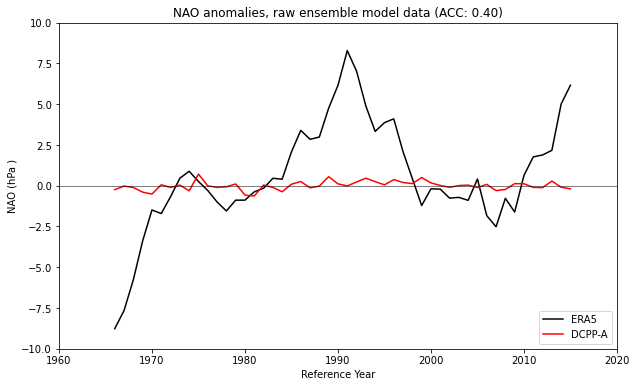

In [14]:
# plot the evolution of the NAO index with time
# first create the figure
fig = plt.figure(figsize=(10, 6))
# add the axes
ax = fig.add_subplot(111)
# plot the data
# now aligned, but still looks very slightly off compared to Doug's plot and Andrea's plot
# perhaps something to ask doug down the line
ax.plot(obs_time[3:], obs_nao_anom[3:], color="black", label="ERA5")
#ax.plot(obs_bl_time[3:], obs_bl_nao_anom[3:], color="black", label="ERA5 hindcast BL", linestyle="--")
ax.plot(model_time_raw[:-4], model_nao_anom_raw[:-4], color="red", label="DCPP-A")
ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
# calculate the ACC
acc_score, _ = pearsonr(obs_nao_anom[3:-5], model_nao_anom_raw[:-9])
# set the x-axis limits
ax.set_xlim([np.datetime64("1960"), np.datetime64("2020")])
# set the y-axis limits
ax.set_ylim([-10, 10])
# set the x-axis label
ax.set_xlabel("Reference Year")
# set the y-axis label
ax.set_ylabel("NAO (hPa )")
# set the title
ax.set_title(f"NAO anomalies, raw ensemble model data (ACC: {acc_score:.2f})")
# add the legend in the bottom right corner
ax.legend(loc="lower right")
# save the figure
plt.savefig("/home/users/benhutch/multi-model/plots/nao-anomaly-raw.png", dpi=300)
# show the figure
plt.show()


In [15]:
# Calculate the ACC and p-value
# cutoff 2010 - short period
ACC, p_value = pearsonr(obs_nao_anom[3:-5], model_nao_anom_raw[:-9])
print("Anomaly Correlation Coefficient (ACC):", ACC)
print("P-value:", p_value)

Anomaly Correlation Coefficient (ACC): 0.39622496111567285
P-value: 0.0070510087848265676


In [16]:
# Shift model_nao_anom data back by 1 years
shifted_model_nao_anom = np.roll(model_nao_anom_raw[:-4], -1)

# Remove the last year of data to avoid wraparound effects
shifted_model_nao_anom = shifted_model_nao_anom[:-1]

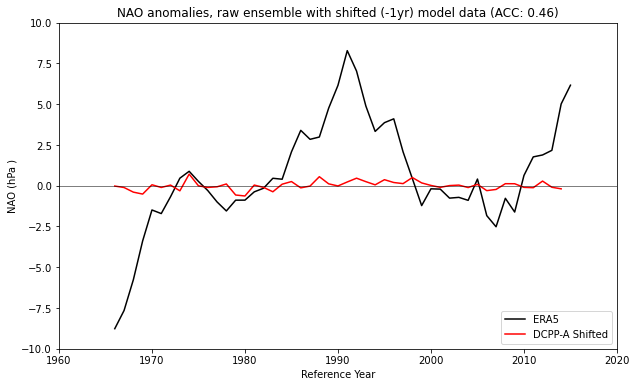

In [17]:
# now plot this
# Plot the evolution of the NAO index with time
# First create the figure
fig = plt.figure(figsize=(10, 6))
# Add the axes
ax = fig.add_subplot(111)
# Plot the data
ax.plot(obs_time[3:], obs_nao_anom[3:], color="black", label="ERA5")
ax.plot(model_time_raw[:-5], shifted_model_nao_anom, color="red", label="DCPP-A Shifted")
ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
# calculate the ACC score 1961-2010
acc_score, _ = pearsonr(obs_nao_anom[3:-6], shifted_model_nao_anom[:-5])
# Set the x-axis limits
ax.set_xlim([np.datetime64("1960"), np.datetime64("2020")])
# Set the y-axis limits
ax.set_ylim([-10, 10])
# Set the x-axis label
ax.set_xlabel("Reference Year")
# Set the y-axis label
ax.set_ylabel("NAO (hPa )")
# Set the title
ax.set_title(f"NAO anomalies, raw ensemble with shifted (-1yr) model data (ACC: {acc_score:.2f})")
# Add the legend in the bottom right corner
ax.legend(loc="lower right")
# Save the figure
plt.savefig("/home/users/benhutch/multi-model/plots/nao-anomaly-shifted.png", dpi=300)
# Show the figure
plt.show()

In [18]:
# now calculate full field skill score for this
# Calculate the ACC and p-value with the shifted data
ACC_shifted, p_value_shifted = pearsonr(obs_nao_anom[3:-1], shifted_model_nao_anom)
print("Anomaly Correlation Coefficient (ACC) with shifted data:", ACC_shifted)
print("P-value with shifted data:", p_value_shifted)


Anomaly Correlation Coefficient (ACC) with shifted data: 0.41161140706869653
P-value with shifted data: 0.003299467320875538


In [19]:
# now calculate long time period (1960-2010) skill scores for this
ACC_shifted_long, p_value_shifted_long = pearsonr(obs_nao_anom[3:-6], shifted_model_nao_anom[:-5])
print("Anomaly Correlation Coefficient (ACC) with shifted data:", ACC_shifted_long)
print("P-value with shifted data:", p_value_shifted_long)

Anomaly Correlation Coefficient (ACC) with shifted data: 0.4551747440821704
P-value with shifted data: 0.0019061798889212363


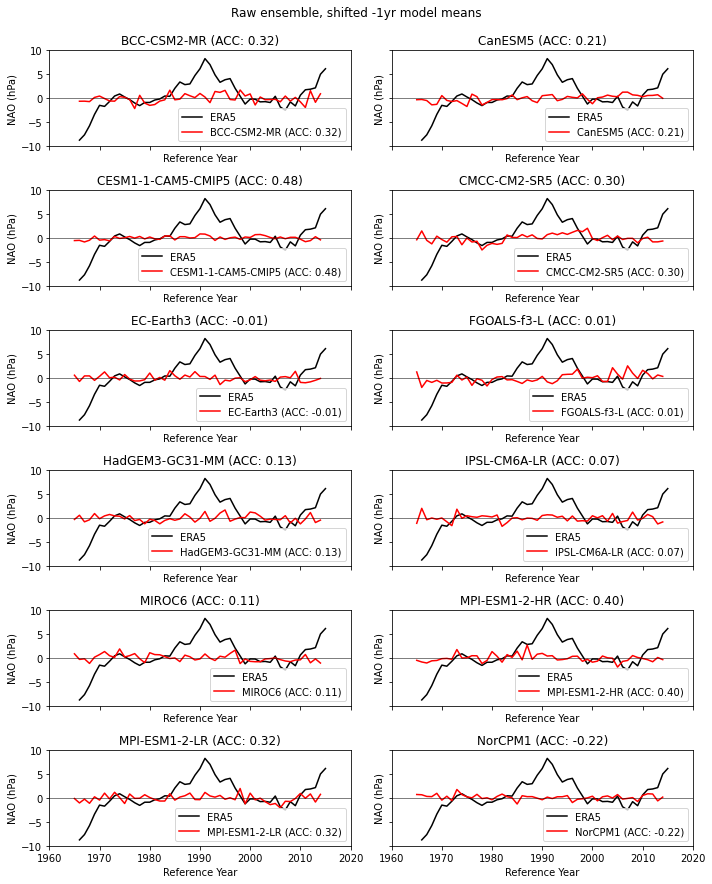

In [20]:
# plot each of the individual subplots
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming `obs_time` and `obs_nao_anom` are the observation data
# Assuming `model_times` and `shifted_model_nao_anoms` are tuples containing the model times and shifted model NAO anomalies, respectively
# Assuming `dataset_names` is a list containing the names of the datasets

# Create a figure with subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, (model_time, shifted_model_nao_anom, name) in enumerate(zip(model_times, shifted_model_nao_anoms, dataset_names)):
    ax = axes[i]

    # Calculate the ACC score
    if name == "BCC-CSM2-MR":
        # BCC model starts in 1961, so adjust the indices accordingly
        acc_score, _ = pearsonr(obs_nao_anom[3:-6], shifted_model_nao_anom[:-5])
    else:
        # Other models start in 1960
        acc_score, _ = pearsonr(obs_nao_anom[2:-6], shifted_model_nao_anom[:-5])

    # Plot the data
    ax.plot(obs_time[3:], obs_nao_anom[3:], color="black", label="ERA5")
    ax.plot(model_time[:-5], shifted_model_nao_anom, color="red", label=f"{name} (ACC: {acc_score:.2f})")

    ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
    ax.set_xlim([np.datetime64("1960"), np.datetime64("2020")])
    ax.set_ylim([-10, 10])
    ax.set_xlabel("Reference Year")
    ax.set_ylabel("NAO (hPa)")

    # Set the title
    ax.set_title(f"{name} (ACC: {acc_score:.2f})")

    # Add the legend in the bottom right corner
    ax.legend(loc="lower right")

# Adjust the layout
plt.tight_layout()

# set up a superior title
plt.suptitle("Raw ensemble, shifted -1yr model means", y=1.02)

# Save the figure
plt.savefig("/home/users/benhutch/multi-model/plots/nao-anomaly-shifted-subplots.png", dpi=300)

# Show the figure
plt.show()

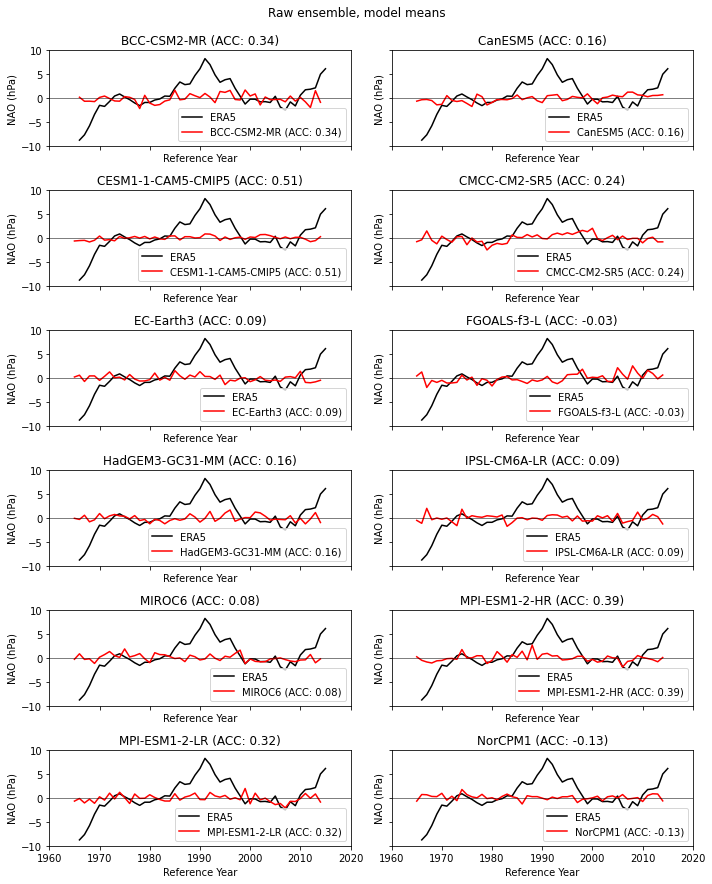

In [21]:
# Assuming `obs_time` and `obs_nao_anom` are the observation data
# Assuming `model_times` and `model_nao_anoms` are tuples containing the model times and original model NAO anomalies, respectively
# Assuming `dataset_names` is a list containing the names of the datasets

# Create a figure with subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, (model_time, model_nao_anom, name) in enumerate(zip(model_times, model_nao_anoms, dataset_names)):
    ax = axes[i]

    # Calculate the ACC score
    if name == "BCC-CSM2-MR":
        # BCC model starts in 1961, so adjust the indices accordingly
        acc_score, _ = pearsonr(obs_nao_anom[3:-5], model_nao_anom[:-9])
    else:
        # Other models start in 1960
        acc_score, _ = pearsonr(obs_nao_anom[2:-5], model_nao_anom[:-9])

    # Plot the data
    ax.plot(obs_time[3:], obs_nao_anom[3:], color="black", label="ERA5")
    ax.plot(model_time[:-5], model_nao_anom[:-5], color="red", label=f"{name} (ACC: {acc_score:.2f})")

    ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
    ax.set_xlim([np.datetime64("1960"), np.datetime64("2020")])
    ax.set_ylim([-10, 10])
    ax.set_xlabel("Reference Year")
    ax.set_ylabel("NAO (hPa)")

    # Set the title
    ax.set_title(f"{name} (ACC: {acc_score:.2f})")

    # Add the legend in the bottom right corner
    ax.legend(loc="lower right")

# Adjust the layout
plt.tight_layout()

# set up a superior title
plt.suptitle("Raw ensemble, model means", y=1.02)

# Save the figure
plt.savefig("/home/users/benhutch/multi-model/plots/nao-anomaly-original-subplots.png", dpi=300)

# Show the figure
plt.show()


In [22]:
# define a function to adjust the variance of the model data to match the observations
def adjust_variance(observation, model_nao):
    # Calculate the ensemble mean for all start times
    y_hat = np.mean(model_nao)

    # Calculate the observed variance and correlation coefficient
    sigma_obs = np.var(observation)
    r = np.corrcoef(observation, model_nao)[0, 1]

    # Calculate the signal variance
    sigma_sig = np.var(model_nao)

    # Adjust the ensemble mean using the provided equation
    adjusted_model_nao = (model_nao - y_hat) * (sigma_obs * r / sigma_sig) + y_hat

    return adjusted_model_nao

In [23]:
# print(np.shape(obs_nao_anom))
print(np.shape(lagged_model_nao_anoms))
# print(obs_time)
# print(lagged_model_times)

(13, 51)


In [24]:
# find the overlapping time range
# between obs_time and lagged_model_time
common_time_range = []
for model_time in lagged_model_times:
    common_range = np.intersect1d(obs_time, model_time)
    common_time_range.append(common_range)
#print(common_time_range)

In [25]:
# extract the overlapping data for eahc model
# then apply the adjust variance for each model
adjusted_lagged_model_nao_anoms = []

# for lagged model NAO anoms, adjust the variance
for i, model_nao_anom in enumerate(lagged_model_nao_anoms):
    # Extract overlapping data
    obs_overlap = obs_nao_anom[np.isin(obs_time, common_time_range[i])]
    model_overlap = model_nao_anom[np.isin(lagged_model_times[i], common_time_range[i])]

    # print(obs_nao_anom)
    # print(model_nao_anom)
    # print(obs_overlap)
    # print(model_overlap)
    
    # Adjust the variance using the overlapping data
    adjusted_model_nao_anom = adjust_variance(obs_overlap, model_overlap)

    # Store the adjusted model NAO anomalies
    adjusted_lagged_model_nao_anoms.append(adjusted_model_nao_anom)

print(np.shape(adjusted_lagged_model_nao_anoms)) # 1969 - 2015

# init empty array to store shifted, lagged, var adjustred NAO anoms
shifted_adjusted_lagged_model_nao_anoms = []

print(np.shape(lagged_shifted_model_nao_anoms))
#print(lagged_shifted_model_nao_anoms)

# for lagged shifted model NAO anoms, adjust the variance
for i, model_nao_anom in enumerate(lagged_shifted_model_nao_anoms):
    # Extract overlapping data
    obs_overlap = obs_nao_anom[np.isin(obs_time, common_time_range[i])]
    model_overlap = model_nao_anom[np.isin(lagged_model_times[i][:-5], common_time_range[i])]

    # print the shapes of the overlapping data for debugging
    # print(obs_overlap[:-1])
    # print(model_overlap)
    # print(np.shape(obs_overlap[:-1]))
    # print(np.shape(model_overlap))
    # print(np.shape(obs_nao_anom))
    # print(np.shape(model_nao_anom))

    # Ensure both arrays have the same length
    if len(obs_overlap[:-1]) < len(model_overlap):
        model_overlap = model_overlap[: len(obs_overlap[:-1])]
    elif len(obs_overlap[:-1]) > len(model_overlap):
        obs_overlap = obs_overlap[:-1][: len(model_overlap)]

    # print(np.shape(obs_overlap[:-1]))
    # print(np.shape(model_overlap))
    
    # Adjust the variance using the overlapping data
    adjusted_model_nao_anom = adjust_variance(obs_overlap[:-1].values, model_overlap)

    # Store the adjusted model NAO anomalies
    shifted_adjusted_lagged_model_nao_anoms.append(adjusted_model_nao_anom)

print(np.shape(shifted_adjusted_lagged_model_nao_anoms)) # 1969 - 2015 shifted

(13, 47)
(13, 46)
(13, 46)


In [26]:
# adjust the variance for the raw ensemble mean data
# model_nao_anom
common_range_raw = np.intersect1d(obs_time,model_time_raw)
print(common_range_raw)

# use the common time range to sub select
obs_overlap_raw = obs_nao_anom[np.isin(obs_time, common_range_raw)]
model_overlap_raw = model_nao_anom_raw[np.isin(model_time_raw, common_range_raw)]

# adjust the variance of the raw data
adjusted_var_model_nao_anom_raw = adjust_variance(obs_overlap_raw, model_overlap_raw)
print(adjusted_var_model_nao_anom_raw)

['1966' '1967' '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975'
 '1976' '1977' '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985'
 '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995'
 '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005'
 '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015']
<xarray.DataArray (time: 50)>
dask.array<add, shape=(50,), dtype=float32, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1966-08-01 00:00:00 ... 2015-08-01 00:00:00
    lon      float64 0.0
    lat      float64 0.0


In [27]:
print(model_time_raw[:-4])
print(adjusted_var_model_nao_anom_raw)

['1966' '1967' '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975'
 '1976' '1977' '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985'
 '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995'
 '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005'
 '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015']
<xarray.DataArray (time: 50)>
dask.array<add, shape=(50,), dtype=float32, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1966-08-01 00:00:00 ... 2015-08-01 00:00:00
    lon      float64 0.0
    lat      float64 0.0


In [28]:
# define a simple function to compute the lagged ensemble mean
# for the adjusted variance raw ensemble data (no lag, not shifted)
# lag = 3, will average 1969, 1968, 1967, 1966 for 1969 data
def lagged_ensemble_mean(data, lag=4):
    # Initialize an empty array for the lagged ensemble mean
    lagged_mean = np.empty(len(data) - lag + 1)
    
    # Calculate the lagged ensemble mean for each year
    for i in range(len(data) - lag + 1):
        lagged_mean[i] = np.mean(data[i:i + lag])
    
    return lagged_mean

# Calculate the lagged ensemble mean for the adjusted_var_model_nao_anom_raw data
lagged_adjusted_var_mean = lagged_ensemble_mean(adjusted_var_model_nao_anom_raw)

# Calculate the corresponding model_time for the lagged data
# define the lag
lag=4
model_time_lagged = model_time_raw[:-4][lag-1:]

# Print the lagged ensemble mean and corresponding model_time
print(model_time_lagged)
print(lagged_adjusted_var_mean)
print(np.shape(model_time_lagged))
print(np.shape(lagged_adjusted_var_mean))


['1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978'
 '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988'
 '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998'
 '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008'
 '2009' '2010' '2011' '2012' '2013' '2014' '2015']
[ -9.81884861 -13.29332161 -12.28329945 -12.24686813  -6.72963953
  -4.18666887   4.16556597   5.45903015   3.6262331    6.78146362
  -0.9555819   -8.1566     -14.85912704 -13.49725723 -16.17721176
 -13.63791275  -4.40180206  -1.65925932  -2.01839519   2.45613456
   8.33154011   6.54491663   8.03807545  11.23364258  10.06594658
  11.78541946  12.66173172  14.44858551  11.06524181   9.52571869
  15.24442482  12.73280525  10.44390869   7.51690483   1.2146641
  -0.51501811  -2.17344141   0.18971646  -3.77048254  -7.16381216
  -4.1403985   -3.67461705  -1.11815155   0.25184536   2.28608274
  -0.47503889  -1.62764561]
(47,)
(47,)


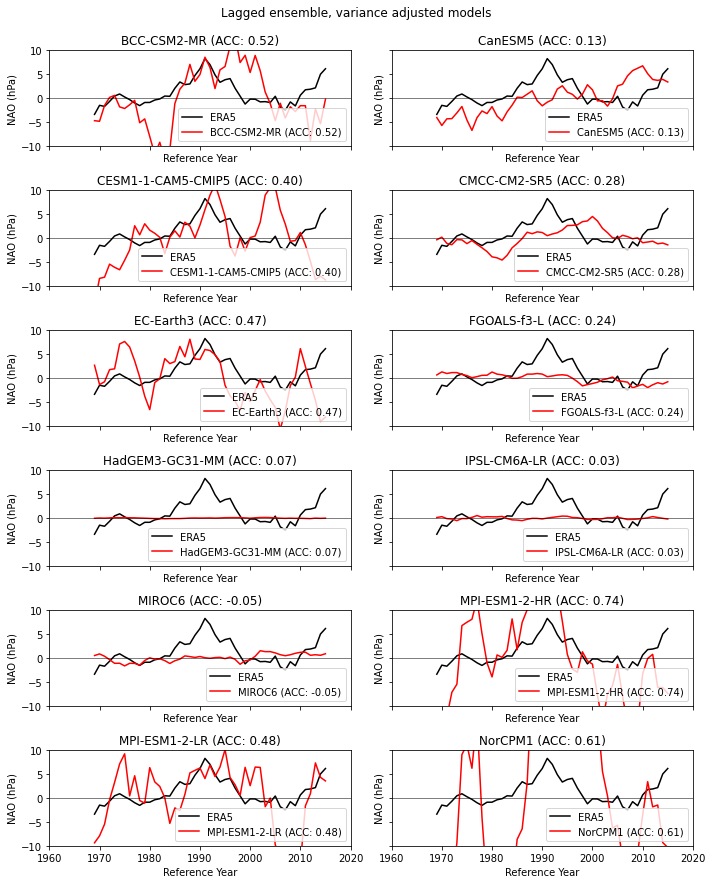

In [29]:
# plot the lagged ensemble, variance adjusted results
# Create a figure with subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, (model_time, model_nao_anom, name) in enumerate(zip(lagged_model_times, adjusted_lagged_model_nao_anoms, dataset_names)):
    ax = axes[i]

    # print("observed shape", np.shape(obs_nao_anom))
    # print("model shape:", np.shape(model_nao_anom))
    # print("model name:", name)
    
    # Calculate the ACC score
    # between 1969 and 2010 - short period like dougs paper
    acc_score, _ = pearsonr(obs_nao_anom[6:-5], model_nao_anom[:-5])

    # debug
    # print(np.shape(model_time))
    # print(np.shape(model_nao_anom))
    # print(model_time)
    # print(model_nao_anom)
    
    # Plot the data
    ax.plot(obs_time[6:], obs_nao_anom[6:], color="black", label="ERA5")
    ax.plot(model_time[:-4], model_nao_anom[:], color="red", label=f"{name} (ACC: {acc_score:.2f})")

    ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
    ax.set_xlim([np.datetime64("1960"), np.datetime64("2020")])
    ax.set_ylim([-10, 10])
    ax.set_xlabel("Reference Year")
    ax.set_ylabel("NAO (hPa)")

    # Set the title
    ax.set_title(f"{name} (ACC: {acc_score:.2f})")

    # Add the legend in the bottom right corner
    ax.legend(loc="lower right")

# Adjust the layout
plt.tight_layout()

# Save the figure
plt.savefig("/home/users/benhutch/multi-model/plots/nao-anomaly-adjusted-lagged-subplots.png", dpi=300)

# add a title
plt.suptitle("Lagged ensemble, variance adjusted models", y=1.02)

# Show the figure
plt.show()


['1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978'
 '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988'
 '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998'
 '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008'
 '2009' '2010']
<xarray.DataArray 'psl' (time: 42)>
dask.array<getitem, shape=(42,), dtype=float32, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1969-08-01 00:00:00 ... 2010-08-01 00:00:00
    lon      float64 0.0
    lat      float64 0.0
<xarray.DataArray 'var151' (time: 42)>
dask.array<getitem, shape=(42,), dtype=float32, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1969-04-17 1970-04-17 ... 2010-04-17
    lon      float64 0.0
    lat      float64 0.0
['1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978'
 '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988'
 '1989' '1990' '1991' '1992' '1993

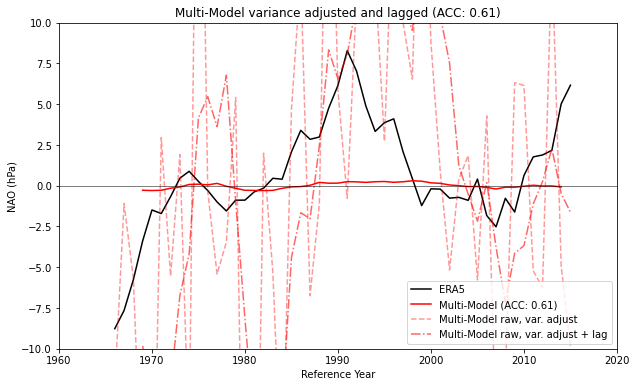

In [30]:
# now plot only the multi-model to see if its out of wack too
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# Find the index of the multi-model output in the lagged_dataset_names list
multi_model_index = lagged_dataset_names.index("multi-model")

# Select the corresponding time and NAO anomaly data
multi_model_time = lagged_model_times[multi_model_index]
multi_model_nao_anom = lagged_model_nao_anoms[multi_model_index]

print(multi_model_time[:-9])
print(multi_model_nao_anom[:-9])
print(obs_nao_anom[6:-5])

# Calculate the ACC score for multi-model output
# 1969-2010
acc_score, _ = pearsonr(obs_nao_anom[6:-5], multi_model_nao_anom[:-9])

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(obs_time[3:], obs_nao_anom[3:], color="black", label="ERA5")
ax.plot(multi_model_time[:-5], multi_model_nao_anom[:-5], color="red", label=f"Multi-Model (ACC: {acc_score:.2f})")
ax.plot(model_time_raw[:-4], adjusted_var_model_nao_anom_raw, color="red", linestyle="--", alpha=0.4, label="Multi-Model raw, var. adjust")
ax.plot(model_time_lagged, lagged_adjusted_var_mean, color="red", linestyle="-.", alpha=0.6, label="Multi-Model raw, var. adjust + lag")

print(model_time_lagged)
print(lagged_adjusted_var_mean)

ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
ax.set_xlim([np.datetime64("1960"), np.datetime64("2020")])
ax.set_ylim([-10, 10])
ax.set_xlabel("Reference Year")
ax.set_ylabel("NAO (hPa)")

# Set the title
ax.set_title(f"Multi-Model variance adjusted and lagged (ACC: {acc_score:.2f})")

# Add the legend in the bottom right corner
ax.legend(loc="lower right")



# Save the figure
plt.savefig("/home/users/benhutch/multi-model/plots/multi-model-lagged-adjusted-nao-anomaly.png", dpi=300)

# Show the figure
plt.show()

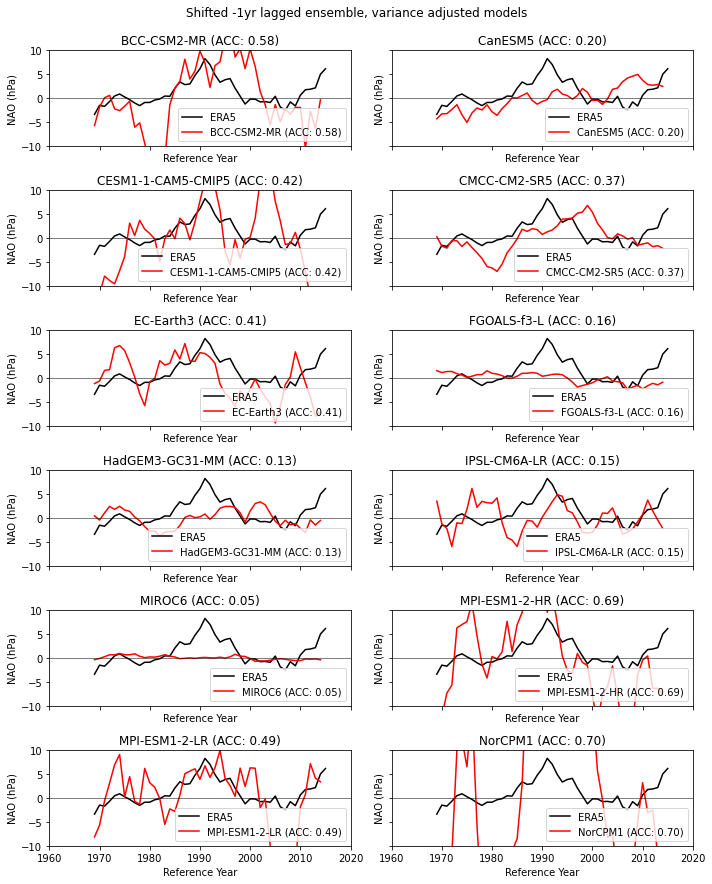

In [31]:
# shift the lagged model NAO anom data back by a year and then adjust variance and plot
# plot the lagged ensemble, variance adjusted results
# Create a figure with subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, (model_time, model_nao_anom, name) in enumerate(zip(lagged_model_times, shifted_adjusted_lagged_model_nao_anoms, dataset_names)):
    ax = axes[i]

    # print(np.shape(obs_nao_anom[6:-7]))
    # print(np.shape(model_nao_anom[:-6]))
    # print(obs_nao_anom[6:-7])
    # print(model_nao_anom[:-6])
    
    # Calculate the ACC score
    # between 1969 and 2010 - short period like dougs paper
    acc_score, _ = pearsonr(obs_nao_anom[6:-7], model_nao_anom[:-6])

    # Plot the data
    ax.plot(obs_time[6:], obs_nao_anom[6:], color="black", label="ERA5")
    ax.plot(model_time[:-5], model_nao_anom[:], color="red", label=f"{name} (ACC: {acc_score:.2f})")

    ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
    ax.set_xlim([np.datetime64("1960"), np.datetime64("2020")])
    ax.set_ylim([-10, 10])
    ax.set_xlabel("Reference Year")
    ax.set_ylabel("NAO (hPa)")

    # Set the title
    ax.set_title(f"{name} (ACC: {acc_score:.2f})")

    # Add the legend in the bottom right corner
    ax.legend(loc="lower right")

# Adjust the layout
plt.tight_layout()

# add a title
plt.suptitle("Shifted -1yr lagged ensemble, variance adjusted models", y=1.02)

# Save the figure
plt.savefig("/home/users/benhutch/multi-model/plots/nao-anomaly-shifted-adjusted-lagged-subplots.png", dpi=300)

# Show the figure
plt.show()


['1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978'
 '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988'
 '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998'
 '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008'
 '2009']
[-42.687912   -40.526306   -22.402573   -11.96189      9.886161
  12.413928     6.5060973   19.407066    -5.652758   -23.031687
 -40.46311    -41.5048     -43.343773   -41.35321    -23.620499
 -11.107458    -8.512604     2.9306815   28.176165    20.809544
  21.439743    34.58491     32.573395    28.33137     33.678764
  35.742985    28.93153     33.612297    41.8512      38.458622
  24.264011    19.726921     5.692335    -0.35173637  -8.273955
  -7.6129165 ]
<xarray.DataArray 'var151' (time: 40)>
dask.array<getitem, shape=(40,), dtype=float32, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1969-04-17 1970-04-17 ... 2008-04-16T12:00:00
    lon      float64 

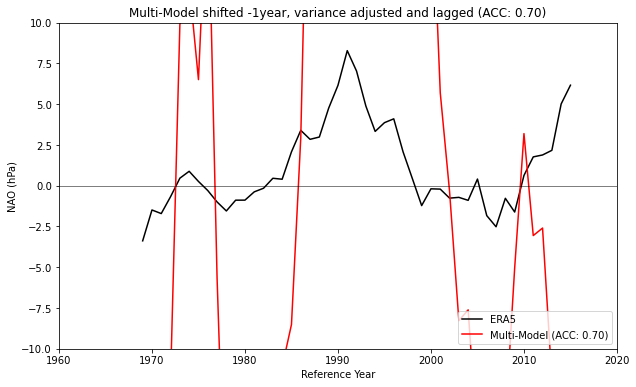

In [32]:
# now plot the shifted multi-model data
# now plot only the multi-model to see if its out of wack too
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# Find the index of the multi-model output in the lagged_dataset_names list
multi_model_index = lagged_dataset_names.index("multi-model")

# Select the corresponding time and NAO anomaly data
multi_model_time = lagged_model_times[multi_model_index]
multi_model_nao_anom = shifted_adjusted_lagged_model_nao_anoms[multi_model_index]

print(multi_model_time[:-10])
print(multi_model_nao_anom[:-10])
print(obs_nao_anom[6:-7])

# Calculate the ACC score for multi-model output
# 1969-2010
acc_score, _ = pearsonr(obs_nao_anom[6:-7], multi_model_nao_anom[:-6])

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(obs_time[6:], obs_nao_anom[6:], color="black", label="ERA5")
ax.plot(multi_model_time[:-5], multi_model_nao_anom[:], color="red", label=f"Multi-Model (ACC: {acc_score:.2f})")
# ax.plot(model_time_raw[:-4], adjusted_var_model_nao_anom_raw, color="red", linestyle="--", alpha=0.4, label="Multi-Model, var. adjust")
# ax.plot(model_time_lagged, lagged_adjusted_var_mean, color="red", linestyle="-.", alpha=0.6, label="Multi-Model, var. adjust + lag")

print(model_time_lagged)
print(lagged_adjusted_var_mean)

ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
ax.set_xlim([np.datetime64("1960"), np.datetime64("2020")])
ax.set_ylim([-10, 10])
ax.set_xlabel("Reference Year")
ax.set_ylabel("NAO (hPa)")

# Set the title
ax.set_title(f"Multi-Model shifted -1year, variance adjusted and lagged (ACC: {acc_score:.2f})")

# Add the legend in the bottom right corner
ax.legend(loc="lower right")

# Save the figure
plt.savefig("/home/users/benhutch/multi-model/plots/multi-model-shifted-lagged-nao-anomaly.png", dpi=300)

# Show the figure
plt.show()

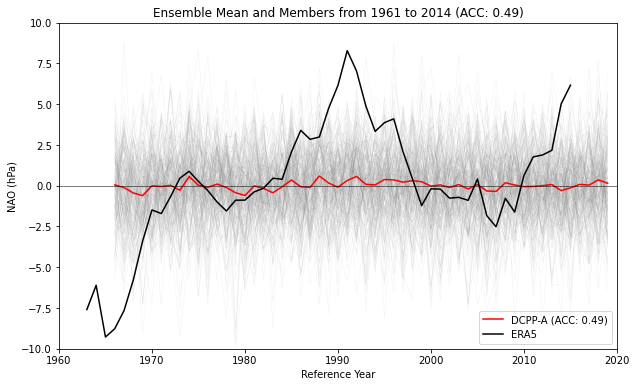

In [34]:
# # for the datasets_by_model dictionary
# which contains the data for all 12 models
# we want to plot the ensemble mean of all members from all models from 1961 to 2014
# and also plot each of the 178 ensemble members (in thin, alpha=0.1, grey lines)

import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Function to calculate ensemble mean for each model
def ensemble_mean(data_array):
    return np.mean(data_array, axis=0)

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize an empty list to store all ensemble members
all_ensemble_members = []

# Plot the ensemble members and calculate the ensemble mean for each model
ensemble_means = []
for model_name in models:
    model_time = model_times_by_model[model_name]
    model_nao_anom = model_nao_anoms_by_model[model_name]

    # Plot ensemble members
    for member in model_nao_anom:
        ax.plot(model_time, member, color="grey", alpha=0.1, linewidth=0.5)
        
        # Add each member to the list of all ensemble members
        all_ensemble_members.append(member)

    # Calculate and store ensemble mean
    ensemble_means.append(ensemble_mean(model_nao_anom))

# Convert the list of all ensemble members to a NumPy array
all_ensemble_members_array = np.array(all_ensemble_members)

# Calculate the grand ensemble mean using the new method
grand_ensemble_mean = np.mean(all_ensemble_members_array, axis=0)

# Calculate the skill scores
# 1966 - 2010
acc_score, _ = pearsonr(obs_nao_anom[3:-5], grand_ensemble_mean[:-9])

acc_score, _ = pearsonr(obs_nao_anom[3:-5], grand_ensemble_mean[:-9])


# Plot the grand ensemble mean with the ACC score in the legend
ax.plot(list(model_times_by_model.values())[0], grand_ensemble_mean, color="red", label=f"DCPP-A (ACC: {acc_score:.2f})")

# Plot ERA5 data
ax.plot(obs_time, obs_nao_anom, color="black", label="ERA5")

ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
ax.set_xlim([np.datetime64("1960"), np.datetime64("2020")])
ax.set_ylim([-10, 10])
ax.set_xlabel("Reference Year")
ax.set_ylabel("NAO (hPa)")

# Set the title with the ACC score
ax.set_title(f"Ensemble Mean and Members from 1961 to 2014 (ACC: {acc_score:.2f})")

# Add the legend in the bottom right corner
ax.legend(loc="lower right")

# Save the figure
plt.savefig("/home/users/benhutch/multi-model/plots/ensemble_mean_and_members.png", dpi=300)

# Show the figure
plt.show()


In [35]:
# to test whether model selection helps to improve the ACC score
# write a function which will only plot the models specified in a list
def plot_ensemble_members_and_mean(models, model_times_by_model, model_nao_anoms_by_model, obs_nao_anom, obs_time):
    
    # Function to calculate ensemble mean for each model
    def ensemble_mean(data_array):
        return np.mean(data_array, axis=0)

    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the ensemble members and calculate the ensemble mean for each model
    ensemble_means = []
    for model_name in models:
        model_time = model_times_by_model[model_name]
        model_nao_anom = model_nao_anoms_by_model[model_name]

        # Plot ensemble members
        for member in model_nao_anom:
            ax.plot(model_time, member, color="grey", alpha=0.1, linewidth=0.5)

        # Calculate and store ensemble mean
        ensemble_means.append(ensemble_mean(model_nao_anom))

    # Calculate the skill scores
    # 1966 - 2010
    grand_ensemble_mean = np.mean(ensemble_means, axis=0)
    acc_score, _ = pearsonr(obs_nao_anom[3:-5], grand_ensemble_mean[:-9])

    # Plot the grand ensemble mean with the ACC score in the legend
    ax.plot(list(model_times_by_model.values())[0], grand_ensemble_mean, color="red", label=f"DCPP-A (ACC: {acc_score:.2f})")

    # Plot ERA5 data
    ax.plot(obs_time, obs_nao_anom, color="black", label="ERA5")

    ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
    ax.set_xlim([np.datetime64("1960"), np.datetime64("2020")])
    ax.set_ylim([-10, 10])
    ax.set_xlabel("Reference Year")
    ax.set_ylabel("NAO (hPa)")

    # Set the title with the ACC score
    ax.set_title(f"Ensemble Mean and Members from 1961 to 2014 (ACC: {acc_score:.2f})")

    # Add the legend in the bottom right corner
    ax.legend(loc="lower right")

    # Show the figure
    plt.show()

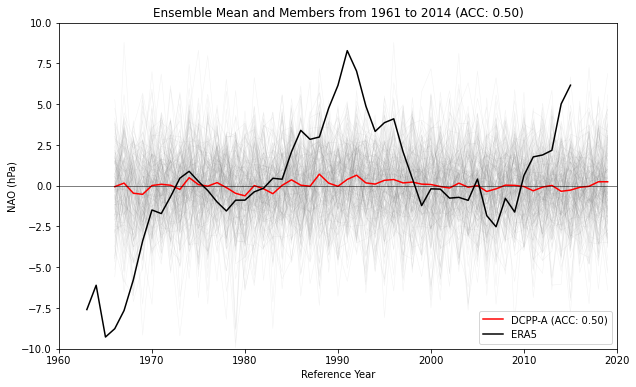

In [36]:
# call this function for the models used in Andrea Marcheggiani paper
marcheg_models = ['BCC-CSM2-MR', 'MPI-ESM1-2-HR', 'CanESM5', 'CMCC-CM2-SR5', 'HadGEM3-GC31-MM', 'EC-Earth3', 'MIROC6', 'IPSL-CM6A-LR', 'CESM1-1-CAM5-CMIP5', 'NorCPM1']
plot_ensemble_members_and_mean(marcheg_models, model_times_by_model, model_nao_anoms_by_model, obs_nao_anom, obs_time)

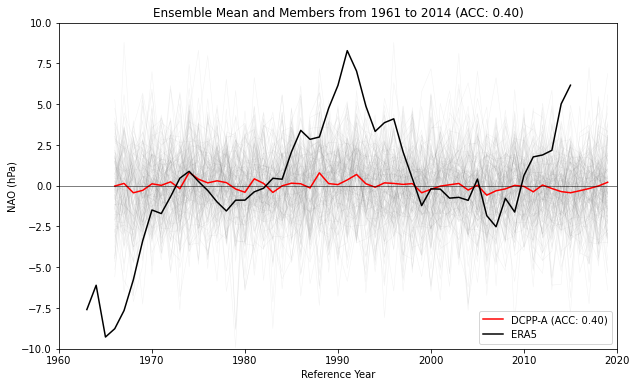

In [37]:
doug_models_cmip6 = [ 'MPI-ESM1-2-HR', 'HadGEM3-GC31-MM', 'EC-Earth3', 'MIROC6', 'IPSL-CM6A-LR', 'CESM1-1-CAM5-CMIP5', 'NorCPM1']
plot_ensemble_members_and_mean(doug_models_cmip6, model_times_by_model, model_nao_anoms_by_model, obs_nao_anom, obs_time)